In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.enable_eager_execution()
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
import math
import numpy as np
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)

C:\Python\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in c:\python\anaconda\lib\site-packages (1.0.1)


You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [4]:
class_names = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [5]:
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print("Number of training examples {}".format(num_train_examples))
print("Number of test examples {}".format(num_test_examples))

Number of training examples 60000
Number of test examples 10000


In [6]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images/=255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

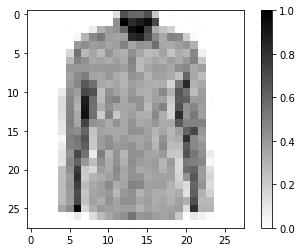

In [7]:
for image, label in test_dataset.take(1):
    break
    
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

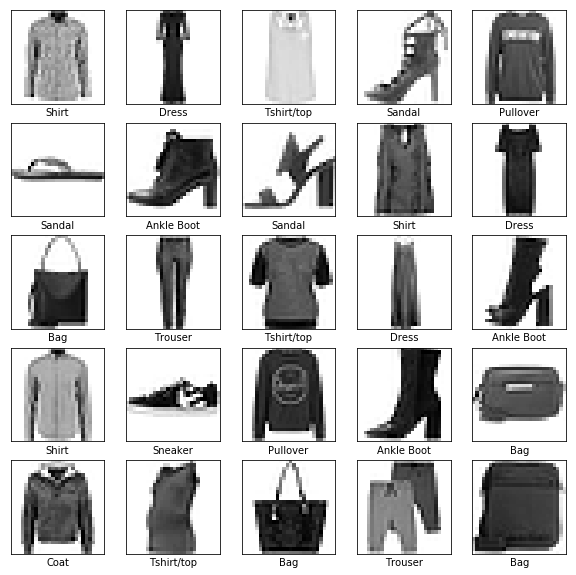

In [8]:
plt.figure(figsize = (10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
    
plt.show()

In [9]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                            ])
print(model)

In [10]:
model.compile(optimizer = tf.train.AdamOptimizer(learning_rate=0.005),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [12]:
model.fit(train_dataset, epochs = 1, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/1


 741/1875 [==========>...................] - ETA: 8:00:21 - loss: 2.6279 - acc: 0.09 - ETA: 1:36:13 - loss: 2.1730 - acc: 0.30 - ETA: 53:33 - loss: 1.8204 - acc: 0.4167 - ETA: 40:14 - loss: 1.6817 - acc: 0.44 - ETA: 32:15 - loss: 1.5945 - acc: 0.45 - ETA: 28:31 - loss: 1.5111 - acc: 0.47 - ETA: 24:17 - loss: 1.4221 - acc: 0.50 - ETA: 19:27 - loss: 1.3241 - acc: 0.53 - ETA: 16:14 - loss: 1.2776 - acc: 0.55 - ETA: 14:20 - loss: 1.2325 - acc: 0.56 - ETA: 12:51 - loss: 1.1964 - acc: 0.57 - ETA: 11:56 - loss: 1.1675 - acc: 0.58 - ETA: 11:08 - loss: 1.1577 - acc: 0.59 - ETA: 10:26 - loss: 1.1383 - acc: 0.59 - ETA: 9:50 - loss: 1.1130 - acc: 0.6069 - ETA: 9:17 - loss: 1.0880 - acc: 0.617 - ETA: 8:39 - loss: 1.0697 - acc: 0.624 - ETA: 8:14 - loss: 1.0632 - acc: 0.625 - ETA: 7:51 - loss: 1.0444 - acc: 0.631 - ETA: 7:24 - loss: 1.0207 - acc: 0.637 - ETA: 7:05 - loss: 1.0247 - acc: 0.637 - ETA: 6:48 - loss: 1.0132 - acc: 0.640 - ETA: 6:33 - loss: 1.0051 - acc: 0.642 - ETA: 6:14 - loss: 0.9911 - a

1545/1875 [=======================>......] - ETA: 41s - loss: 0.5818 - acc: 0.78 - ETA: 41s - loss: 0.5810 - acc: 0.78 - ETA: 40s - loss: 0.5809 - acc: 0.78 - ETA: 40s - loss: 0.5802 - acc: 0.78 - ETA: 40s - loss: 0.5803 - acc: 0.78 - ETA: 40s - loss: 0.5794 - acc: 0.79 - ETA: 39s - loss: 0.5788 - acc: 0.79 - ETA: 39s - loss: 0.5790 - acc: 0.79 - ETA: 39s - loss: 0.5785 - acc: 0.79 - ETA: 39s - loss: 0.5787 - acc: 0.79 - ETA: 39s - loss: 0.5777 - acc: 0.79 - ETA: 38s - loss: 0.5765 - acc: 0.79 - ETA: 38s - loss: 0.5763 - acc: 0.79 - ETA: 38s - loss: 0.5760 - acc: 0.79 - ETA: 38s - loss: 0.5756 - acc: 0.79 - ETA: 38s - loss: 0.5756 - acc: 0.79 - ETA: 38s - loss: 0.5753 - acc: 0.79 - ETA: 37s - loss: 0.5752 - acc: 0.79 - ETA: 37s - loss: 0.5744 - acc: 0.79 - ETA: 37s - loss: 0.5744 - acc: 0.79 - ETA: 37s - loss: 0.5743 - acc: 0.79 - ETA: 36s - loss: 0.5741 - acc: 0.79 - ETA: 36s - loss: 0.5735 - acc: 0.79 - ETA: 36s - loss: 0.5734 - acc: 0.79 - ETA: 35s - loss: 0.5725 - acc: 0.79 - ETA: 

1875/1875 [==============================] - ETA: 8s - loss: 0.5111 - acc: 0.814 - ETA: 8s - loss: 0.5110 - acc: 0.815 - ETA: 8s - loss: 0.5107 - acc: 0.815 - ETA: 7s - loss: 0.5104 - acc: 0.815 - ETA: 7s - loss: 0.5104 - acc: 0.815 - ETA: 7s - loss: 0.5100 - acc: 0.815 - ETA: 7s - loss: 0.5096 - acc: 0.815 - ETA: 7s - loss: 0.5097 - acc: 0.815 - ETA: 7s - loss: 0.5094 - acc: 0.815 - ETA: 7s - loss: 0.5092 - acc: 0.815 - ETA: 7s - loss: 0.5089 - acc: 0.816 - ETA: 7s - loss: 0.5085 - acc: 0.816 - ETA: 6s - loss: 0.5082 - acc: 0.816 - ETA: 6s - loss: 0.5080 - acc: 0.816 - ETA: 6s - loss: 0.5079 - acc: 0.816 - ETA: 6s - loss: 0.5075 - acc: 0.816 - ETA: 6s - loss: 0.5074 - acc: 0.816 - ETA: 6s - loss: 0.5070 - acc: 0.816 - ETA: 6s - loss: 0.5068 - acc: 0.816 - ETA: 6s - loss: 0.5062 - acc: 0.816 - ETA: 6s - loss: 0.5061 - acc: 0.816 - ETA: 6s - loss: 0.5056 - acc: 0.817 - ETA: 6s - loss: 0.5053 - acc: 0.817 - ETA: 5s - loss: 0.5050 - acc: 0.817 - ETA: 5s - loss: 0.5049 - acc: 0.817 - ETA: 

In [13]:
test_loss, test_accuracy= model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - ETA: 10 - ETA: 4 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 9ms/step


0.8459

In [14]:
for test_images, test_labels in test_dataset.take(1):
    test_images= test_images.numpy()
    test_labels= test_labels.numpy()
    predictions = model.predict(test_images)

In [15]:
predictions.shape

(32, 10)

In [16]:
predictions[0]

array([2.4581052e-04, 5.9002709e-06, 3.3205688e-02, 1.2401822e-04,
       2.5008067e-01, 4.6102223e-06, 7.1628952e-01, 5.3414801e-09,
       4.3724387e-05, 5.6749272e-08], dtype=float32)

In [17]:
np.argmax(predictions[0])

6

In [18]:
test_labels[0]

6

In [19]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[...,0], cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color = color))
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
        
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

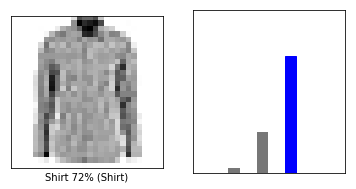

In [20]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

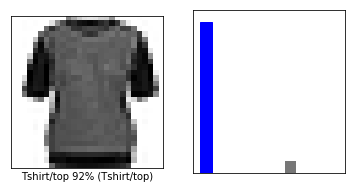

In [21]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

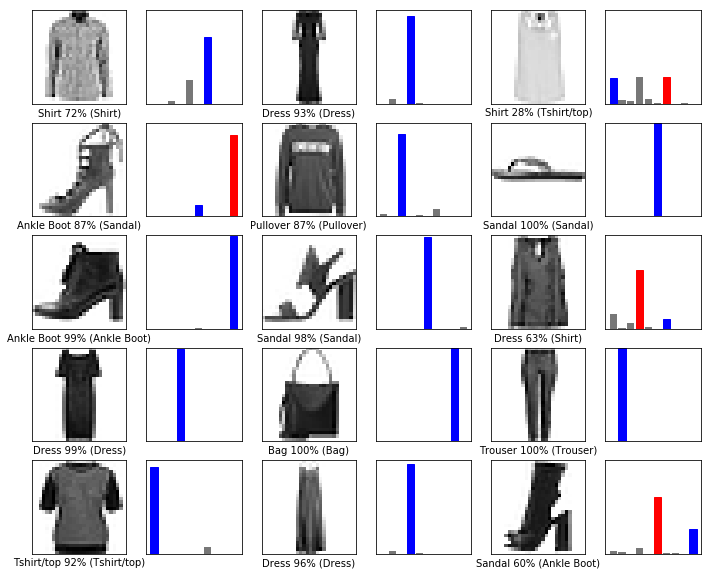

In [22]:
num_rows = 5
num_cols = 3
num_images = num_cols * num_rows
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [23]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [24]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [25]:
predictions_single =model.predict(img)
print(predictions_single)

[[2.4581040e-04 5.9002655e-06 3.3205658e-02 1.2401822e-04 2.5008067e-01
  4.6102264e-06 7.1628952e-01 5.3414801e-09 4.3724431e-05 5.6749272e-08]]


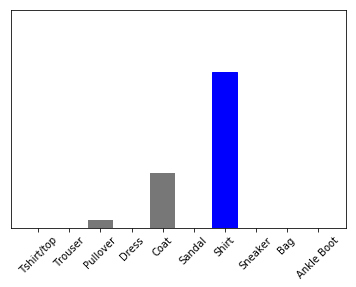

In [26]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [27]:
np.argmax(predictions_single[0])

6